
# Concentration de monuments dans les zones

## Fetching data

In [1]:
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
import pandas as pd
import xlrd

In [2]:
wb = xlrd.open_workbook('coords.xlsx')
zones_tarifaires = geopandas.read_file('./zones-tarifaires.geojson')
city = geopandas.read_file('./residentiels.geojson')

In [3]:
sh = wb.sheet_by_name('Feuille 1')
for rownum in range(sh.nrows):
    print (sh.row_values(rownum))

['', 'nom', 'lat', 'long', 'Fréquentation']
[0.0, 'Arc de triomphe du Carrousel', 48.861944, 2.332778, '']
['', 'Chapelle notre dame', 48.8509782, 2.3233133, 2000000.0]
['', 'Fondation L Vuitton', 48.8766138, 2.2634224, 1400000.0]
['', 'Opéra Garnier', 48.8719697, 2.3316014, 720000.0]
['', 'Tour notre Dame', 48.8534659, 2.3493166, 430000.0]
['', 'Conciergerie', 48.8560114, 2.3454953, 390000.0]
['', 'Maison Victor Hugo', 48.8548007, 2.3662118, 166000.0]
[1.0, "Arc de triomphe de l'Étoile", 48.8738, 2.295, 1583260.0]
[2.0, 'Arche de la Défense', 48.893056, 2.236389, '']
[3.0, 'Porte Saint-Denis', 48.869722, 2.3525, '']
[4.0, 'Porte Saint-Martin', 48.869171, 2.355601, '']
[5.0, 'Colonne Médicis', 48.8625, 2.3429861111111, '']
[6.0, 'Colonne de Juillet', 48.853055555556, 2.3691666666667, '']
[7.0, 'Colonne Vendôme', 48.867469, 2.329414, '']
[8.0, 'Obélisque de Louxor', 48.8655, 2.3211, '']
[9.0, 'Barrière du Trône', 48.84815, 2.398735, '']
[10.0, 'Fontaine des Innocents', 48.86065, 2.34801

[2519.0, 'CHAMPS-ELYSEES - CLEMENCEAU', 48.8678427062, 2.31320999172, '']
[2520.0, 'MONTTESSUY', 48.8588424187, 2.29838123232, '']
[2521.0, 'RAPP - LA BOURDONNAIS', 48.8574857033, 2.29958083863, '']
[2522.0, 'CHAMP DE MARS - SUFFREN', 48.8549140156, 2.29572834292, '']
[2523.0, 'RUE ROUELLE', 48.8501659622, 2.28866418744, '']
[2524.0, 'THEATRE', 48.849194978, 2.28784800744, '']
[2525.0, 'VASCO DE GAMA - LOURMEL', 48.8377063335, 2.28197720514, '']
[2526.0, 'CAPUCINES - CAUMARTIN', 48.8700917281, 2.32969355906, '']
[2527.0, 'CADET', 48.8755920546, 2.34322247131, '']
[2528.0, 'HOTEL DE VILLE', 48.8576617921, 2.34949940252, '']
[2530.0, 'CHATELET', 48.8590281157, 2.34693902635, '']
[2532.0, 'MICHEL DEBRE', 48.8517844515, 2.3307040211, '']
[2533.0, 'SEVRES - LECOURBE', 48.8449602995, 2.31131421077, '']
[2534.0, 'MAIRIE DU 15E', 48.8418922, 2.29889773358, '']
[2535.0, 'MARTIN NADAUD', 48.8647663339, 2.39523096359, '']
[2537.0, 'MURIERS', 48.8638243927, 2.39155197005, '']
[2538.0, 'SAINT MAUR 

[4569.0, 'GLACIERE - NORDMANN', 48.832479189, 2.34433384055, '']
[4570.0, 'PORTE DE BAGNOLET - LOUIS GANNE', 48.8633743012, 2.40979120186, '']
[4571.0, 'MARAICHERS', 48.8524930166, 2.40558132382, '']
[4572.0, 'BUZENVAL', 48.8518838997, 2.40194428391, '']
[4573.0, 'AVRON', 48.8512749288, 2.39780343758, '']
[4574.0, 'AVRON', 48.8510684034, 2.39743549289, '']
[4577.0, 'SAINT-MARCEL - LA PITIE', 48.8392536532, 2.36108188802, '']
[4579.0, 'POTERNE DES PEUPLIERS', 48.8199585458, 2.35308367432, '']
[4580.0, 'MOULIN DES PRES - TOLBIAC', 48.826141995, 2.35361643276, '']
[4582.0, 'STADE DEJERINE', 48.857378613, 2.41155345649, '']
[4585.0, 'PONT NEUF', 48.8603136673, 2.34041477109, '']
[4588.0, 'HOTEL DE VILLE', 48.8578054462, 2.35083423734, '']
[4589.0, 'LA VERRERIE', 48.8576162441, 2.35444358523, '']
[4591.0, 'MATHURIN MOREAU - SIMON BOLIVAR', 48.8783996199, 2.3737991535, '']
[4592.0, 'GENERAL COCHET', 48.886497868, 2.39471015264, '']
[4593.0, 'PORTE CHAUMONT', 48.8861826575, 2.39605896312, '']

[7001.0, 'PORTE DE CLICHY', 48.8948044873, 2.31333378466, '']
[7002.0, 'PORTE DE VANVES', 48.8275317936, 2.30484338542, '']
[7003.0, 'PERNETY', 48.8337900205, 2.31792263989, '']
[7004.0, 'PERNETY', 48.8350566855, 2.3146002432, '']
[7007.0, "PORTE D'ORLEANS", 48.8225294628, 2.3251543596, '']
[7009.0, 'MONCEY', 48.8797531668, 2.33132729219, '']
[7011.0, 'RUE DU BAC - RENE CHAR', 48.8554689109, 2.32552803051, '']
[7012.0, 'NOTRE-DAME-DES-CHAMPS', 48.8449088836, 2.32858063224, '']
[7040.0, 'REPUBLIQUE - MAGENTA', 48.8687052082, 2.36266209984, '']
[7044.0, 'MAIRIE DU 18E - JULES JOFFRIN', 48.8921913369, 2.34551413131, '']
[7045.0, 'MOINES - DAVY', 48.8919840592, 2.32294381308, '']
[7047.0, 'PARC MARTIN LUTHER KING', 48.8894936329, 2.31633455951, '']
[7048.0, "JOUFFROY D'ABBANS - MALESHERBES", 48.8852677824, 2.30756006871, '']
[7049.0, 'WAGRAM - PRONY', 48.883163356, 2.30234210212, '']
[7050.0, 'WAGRAM - COURCELLES', 48.8812035119, 2.30027218394, '']
[7079.0, 'CHARONNE - KELLER', 48.85375509

## Plotting the number of monuments/metro stations per zone

In [4]:
lat, long = [], []
for rownum in range(1, sh.nrows):
    row = sh.row_values(rownum)
    lat.append(row[2])
    long.append(row[3])

In [5]:
d={'long': long, 'lat': lat}
df = pd.DataFrame(data = d, dtype=float)

In [6]:
l=[]
for i in range(len(df)):
    l.append(Point(df.iloc[i]))
    
df['points']=l
df

long        lat                                   points
0     2.332778  48.861944               POINT (2.332778 48.861944)
1     2.323313  48.850978             POINT (2.3233133 48.8509782)
2     2.263422  48.876614             POINT (2.2634224 48.8766138)
3     2.331601  48.871970             POINT (2.3316014 48.8719697)
4     2.349317  48.853466             POINT (2.3493166 48.8534659)
5     2.345495  48.856011             POINT (2.3454953 48.8560114)
6     2.366212  48.854801             POINT (2.3662118 48.8548007)
7     2.295000  48.873800                    POINT (2.295 48.8738)
8     2.236389  48.893056               POINT (2.236389 48.893056)
9     2.352500  48.869722                 POINT (2.3525 48.869722)
10    2.355601  48.869171               POINT (2.355601 48.869171)
11    2.342986  48.862500          POINT (2.3429861111111 48.8625)
12    2.369167  48.853056  POINT (2.3691666666667 48.853055555556)
13    2.329414  48.867469               POINT (2.329414 48.867469)
14    2.321100  48.865500                   POINT (2.3211 48.8655)
15    2.398735  48.848150                POINT (2.398735 48.84815)
16    2.348011  48.860650         POINT (2.3480111111111 48.86065)
17    2.347269  48.857497           POINT (2.34726944 48.85749722)
18    2.351500  48.859500                   POINT (2.3515 48.8595)
19    2.343700  48.853144               POINT (2.3437 48.85314444)
20    2.333444  48.850889               POINT (2.333444 48.850889)
21    2.339167  48.848056           POINT (2.33916667 48.84805556)
22    2.333060  48.853330                 POINT (2.33306 48.85333)
23    2.336806  48.841056           POINT (2.33680556 48.84105556)
24    2.325111  48.854681              POINT (2.325111 48.8546806)
25    2.340830  48.857200                  POINT (2.34083 48.8572)
26    2.365528  48.855611               POINT (2.365528 48.855611)
27    2.341111  48.865833  POINT (2.3411111111111 48.865833333333)
28    2.363800  48.867500                   POINT (2.3638 48.8675)
29    2.395936  48.848401               POINT (2.395936 48.848401)
...        ...        ...                                      ...
3193  2.440171  48.837477       POINT (2.4401711042 48.8374769576)
3194  2.324883  48.874873      POINT (2.32488327193 48.8748725783)
3195  2.373951  48.880557      POINT (2.37395056443 48.8805565173)
3196  2.391452  48.872084       POINT (2.39145162645 48.872083815)
3197  2.396365  48.867759      POINT (2.39636502122 48.8677585691)
3198  2.340240  48.897755      POINT (2.34023985326 48.8977546321)
3199  2.356132  48.856466      POINT (2.35613209198 48.8564655974)
3200  2.324338  48.821064       POINT (2.3243380546 48.8210643844)
3201  2.345760  48.896011      POINT (2.34576008839 48.8960108615)
3202  2.442132  48.844351      POINT (2.44213195716 48.8443507262)
3203  2.345079  48.897665      POINT (2.34507881518 48.8976645414)
3204  2.370329  48.863500      POINT (2.37032868662 48.8634996426)
3205  2.389647  48.852276      POINT (2.38964684438 48.8522764055)
3206  2.377360  48.830801      POINT (2.37735954917 48.8308009476)
3207  2.346357  48.880310      POINT (2.34635707049 48.8803101766)
3208  2.344136  48.881083      POINT (2.34413608133 48.8810832296)
3209  2.347871  48.887527      POINT (2.34787107122 48.8875267992)
3210  2.345146  48.892892       POINT (2.34514624282 48.892892361)
3211  2.258727  48.870569      POINT (2.25872725857 48.8705693813)
3212  2.334408  48.866614      POINT (2.33440753095 48.8666138306)
3213  2.285310  48.881063       POINT (2.28531035413 48.881063121)
3214  2.376442  48.859849      POINT (2.37644216718 48.8598489051)
3215  2.294804  48.886208      POINT (2.29480383305 48.8862075797)
3216  2.350603  48.857536      POINT (2.35060262085 48.8575358496)
3217  2.317584  48.865120      POINT (2.31758402477 48.8651203383)
3218  2.296512  48.863497      POINT (2.29651154088 48.8634972675)
3219  2.360004  48.864859      POINT (2.36000387256 48.8648591558)
3220  2.346769  48.897862      POINT (2.34676908223 48.89

In [7]:
l=[]
for i in range(len(df)):
    c=0
    try:
        while (not(city.iloc[c]['geometry'].contains(df.iloc[i]['points']))):
            c=c+1
            
        l.append(city.iloc[c]['nom'])
    except:
        l.append('NoZone')
        
df['zone']=l
df

long        lat                                   points    zone
0     2.332778  48.861944               POINT (2.332778 48.861944)      1E
1     2.323313  48.850978             POINT (2.3233133 48.8509782)      7N
2     2.263422  48.876614             POINT (2.2634224 48.8766138)  NoZone
3     2.331601  48.871970             POINT (2.3316014 48.8719697)      9G
4     2.349317  48.853466             POINT (2.3493166 48.8534659)      4E
5     2.345495  48.856011             POINT (2.3454953 48.8560114)      1E
6     2.366212  48.854801             POINT (2.3662118 48.8548007)     34F
7     2.295000  48.873800                    POINT (2.295 48.8738)     17E
8     2.236389  48.893056               POINT (2.236389 48.893056)  NoZone
9     2.352500  48.869722                 POINT (2.3525 48.869722)     10F
10    2.355601  48.869171               POINT (2.355601 48.869171)     10F
11    2.342986  48.862500          POINT (2.3429861111111 48.8625)      1E
12    2.369167  48.853056  POINT (2.3691666666667 48.853055555556)     12E
13    2.329414  48.867469               POINT (2.329414 48.867469)      1E
14    2.321100  48.865500                   POINT (2.3211 48.8655)      8H
15    2.398735  48.848150                POINT (2.398735 48.84815)     11L
16    2.348011  48.860650         POINT (2.3480111111111 48.86065)      1E
17    2.347269  48.857497           POINT (2.34726944 48.85749722)      1E
18    2.351500  48.859500                   POINT (2.3515 48.8595)      4E
19    2.343700  48.853144               POINT (2.3437 48.85314444)      6E
20    2.333444  48.850889               POINT (2.333444 48.850889)      6E
21    2.339167  48.848056           POINT (2.33916667 48.84805556)      6G
22    2.333060  48.853330                 POINT (2.33306 48.85333)      6E
23    2.336806  48.841056           POINT (2.33680556 48.84105556)      6G
24    2.325111  48.854681              POINT (2.325111 48.8546806)      7M
25    2.340830  48.857200                  POINT (2.34083 48.8572)      1E
26    2.365528  48.855611               POINT (2.365528 48.855611)     34F
27    2.341111  48.865833  POINT (2.3411111111111 48.865833333333)      2E
28    2.363800  48.867500                   POINT (2.3638 48.8675)     10F
29    2.395936  48.848401               POINT (2.395936 48.848401)     11L
...        ...        ...                                      ...     ...
3193  2.440171  48.837477       POINT (2.4401711042 48.8374769576)  NoZone
3194  2.324883  48.874873      POINT (2.32488327193 48.8748725783)      8K
3195  2.373951  48.880557      POINT (2.37395056443 48.8805565173)     19J
3196  2.391452  48.872084       POINT (2.39145162645 48.872083815)     20E
3197  2.396365  48.867759      POINT (2.39636502122 48.8677585691)     20R
3198  2.340240  48.897755      POINT (2.34023985326 48.8977546321)     18S
3199  2.356132  48.856466      POINT (2.35613209198 48.8564655974)      4E
3200  2.324338  48.821064       POINT (2.3243380546 48.8210643844)     14G
3201  2.345760  48.896011      POINT (2.34576008839 48.8960108615)     18S
3202  2.442132  48.844351      POINT (2.44213195716 48.8443507262)  NoZone
3203  2.345079  48.897665      POINT (2.34507881518 48.8976645414)     18M
3204  2.370329  48.863500      POINT (2.37032868662 48.8634996426)     11G
3205  2.389647  48.852276      POINT (2.38964684438 48.8522764055)     11L
3206  2.377360  48.830801      POINT (2.37735954917 48.8308009476)     13P
3207  2.346357  48.880310      POINT (2.34635707049 48.8803101766)      9F
3208  2.344136  48.881083      POINT (2.34413608133 48.8810832296)      9F
3209  2.347871  48.887527      POINT (2.34787107122 48.8875267992)     18G
3210  2.345146  48.892892       POINT (2.34514624282 48.892892361)     18M
3211  2.258727  48.870569      POINT (2.25872725857 48.8705693813)  NoZone
3212  2.334408  48.866614      POINT (2.33440753095 48.8666138306)      1E
3213  2.285310  48.881063       POINT (2.28531035413 48.881063121)     17F
3214  2.376442  48.859849      POIN

In [8]:
drop_list=[]
for i in range(len(df)):
    if (df.iloc[i]['zone']=='NoZone'):
        drop_list.append(i)
        
df1=df.drop(drop_list)
df1

long        lat                                   points zone
0     2.332778  48.861944               POINT (2.332778 48.861944)   1E
1     2.323313  48.850978             POINT (2.3233133 48.8509782)   7N
3     2.331601  48.871970             POINT (2.3316014 48.8719697)   9G
4     2.349317  48.853466             POINT (2.3493166 48.8534659)   4E
5     2.345495  48.856011             POINT (2.3454953 48.8560114)   1E
6     2.366212  48.854801             POINT (2.3662118 48.8548007)  34F
7     2.295000  48.873800                    POINT (2.295 48.8738)  17E
9     2.352500  48.869722                 POINT (2.3525 48.869722)  10F
10    2.355601  48.869171               POINT (2.355601 48.869171)  10F
11    2.342986  48.862500          POINT (2.3429861111111 48.8625)   1E
12    2.369167  48.853056  POINT (2.3691666666667 48.853055555556)  12E
13    2.329414  48.867469               POINT (2.329414 48.867469)   1E
14    2.321100  48.865500                   POINT (2.3211 48.8655)   8H
15    2.398735  48.848150                POINT (2.398735 48.84815)  11L
16    2.348011  48.860650         POINT (2.3480111111111 48.86065)   1E
17    2.347269  48.857497           POINT (2.34726944 48.85749722)   1E
18    2.351500  48.859500                   POINT (2.3515 48.8595)   4E
19    2.343700  48.853144               POINT (2.3437 48.85314444)   6E
20    2.333444  48.850889               POINT (2.333444 48.850889)   6E
21    2.339167  48.848056           POINT (2.33916667 48.84805556)   6G
22    2.333060  48.853330                 POINT (2.33306 48.85333)   6E
23    2.336806  48.841056           POINT (2.33680556 48.84105556)   6G
24    2.325111  48.854681              POINT (2.325111 48.8546806)   7M
25    2.340830  48.857200                  POINT (2.34083 48.8572)   1E
26    2.365528  48.855611               POINT (2.365528 48.855611)  34F
27    2.341111  48.865833  POINT (2.3411111111111 48.865833333333)   2E
28    2.363800  48.867500                   POINT (2.3638 48.8675)  10F
29    2.395936  48.848401               POINT (2.395936 48.848401)  11L
30    2.335770  48.862100                  POINT (2.33577 48.8621)   1E
31    2.332450  48.834400                  POINT (2.33245 48.8344)  14P
...        ...        ...                                      ...  ...
3190  2.396541  48.867174      POINT (2.39654145263 48.8671743033)  20F
3191  2.379737  48.857915      POINT (2.37973685462 48.8579154809)  11H
3192  2.384042  48.828695      POINT (2.38404179617 48.8286954036)  13P
3194  2.324883  48.874873      POINT (2.32488327193 48.8748725783)   8K
3195  2.373951  48.880557      POINT (2.37395056443 48.8805565173)  19J
3196  2.391452  48.872084       POINT (2.39145162645 48.872083815)  20E
3197  2.396365  48.867759      POINT (2.39636502122 48.8677585691)  20R
3198  2.340240  48.897755      POINT (2.34023985326 48.8977546321)  18S
3199  2.356132  48.856466      POINT (2.35613209198 48.8564655974)   4E
3200  2.324338  48.821064       POINT (2.3243380546 48.8210643844)  14G
3201  2.345760  48.896011      POINT (2.34576008839 48.8960108615)  18S
3203  2.345079  48.897665      POINT (2.34507881518 48.8976645414)  18M
3204  2.370329  48.863500      POINT (2.37032868662 48.8634996426)  11G
3205  2.389647  48.852276      POINT (2.38964684438 48.8522764055)  11L
3206  2.377360  48.830801      POINT (2.37735954917 48.8308009476)  13P
3207  2.346357  48.880310      POINT (2.34635707049 48.8803101766)   9F
3208  2.344136  48.881083      POINT (2.34413608133 48.8810832296)   9F
3209  2.347871  48.887527      POINT (2.34787107122 48.8875267992)  18G
3210  2.345146  48.892892       POINT (2.34514624282 48.892892361)  18M
3212  2.334408  48.866614      POINT (2.33440753095 48.8666138306)   1E
3213  2.285310  48.881063       POINT (2.28531035413 48.881063121)  17F
3214  2.376442  48.859849      POINT (2.37644216718 48.8598489051)  11H
3215  2.294804  48.886208      POINT (2.29480383305 48.8862075797)  17N
3216  2.350603  48.857536      POINT (2.3506026208

In [9]:
nb_monuments = df1.groupby(['zone'])['long'].count()
coords = df1.groupby(['zone'])['points'].first()

coords_df = coords.to_frame()

nb_monuments_df = nb_monuments.to_frame()

In [10]:
test = pd.merge(coords_df, nb_monuments_df, on='zone')
test=test.reset_index()
test.head()

zone                                   points  long
0  10E  POINT (2.3680833333333 48.872333333333)    15
1  10F                 POINT (2.3525 48.869722)    50
2  10G                POINT (2.35616 48.881642)    52
3  11E      POINT (2.37475708172 48.8652598567)     9
4  11F               POINT (2.381712 48.866215)     8

In [11]:
noms=[]
def fun(x):
    if x in noms:
        return noms.index(x)
    else:
        noms.append(x)
        return len(noms)-1
city['id'] = city['nom'].map(fun)

In [12]:
gdf = geopandas.GeoDataFrame(test, geometry='points')
gdf['residential_id'] = gdf['zone'].map(lambda x: noms.index(x))
gdf.head()

zone                                   points  long  residential_id
0  10E  POINT (2.3680833333333 48.872333333333)    15             105
1  10F                 POINT (2.3525 48.869722)    50              26
2  10G                POINT (2.35616 48.881642)    52              53
3  11E      POINT (2.37475708172 48.8652598567)     9             106
4  11F               POINT (2.381712 48.866215)     8             107

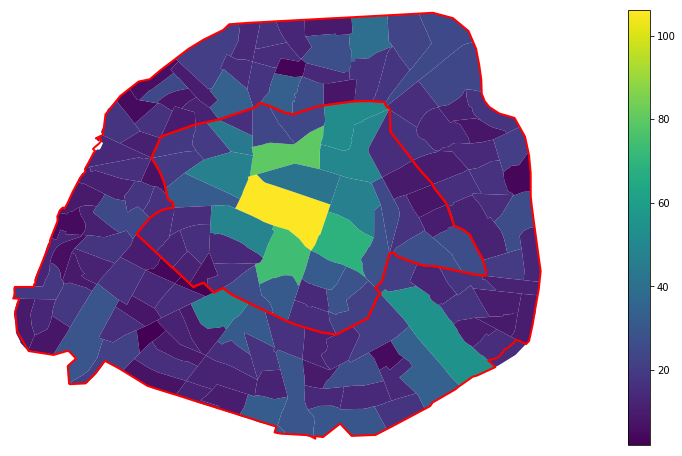

In [13]:
f, ax = plt.subplots(1, 1, figsize=(30, 8), subplot_kw={
    'projection': gcrs.AlbersEqualArea()})

gplt.aggplot(gdf, projection=gcrs.AlbersEqualArea(), hue='long',
             by='residential_id', geometry=city.geometry, agg=np.mean, linewidth=0, ax = ax)

gplt.polyplot(zones_tarifaires, projection=gcrs.AlbersEqualArea(), edgecolor='red', linewidth=2, ax = ax)

In [14]:
test.sort_values('long', ascending=False).head(15)

zone                                   points  long  residential_id  \
117   1E               POINT (2.332778 48.861944)   106              22   
159   9G             POINT (2.3316014 48.8719697)    80             109   
138   6E               POINT (2.3437 48.85314444)    74              82   
132   4E             POINT (2.3493166 48.8534659)    69              49   
11   12F               POINT (2.383081 48.839039)    55              87   
2    10G                POINT (2.35616 48.881642)    52              53   
1    10F                 POINT (2.3525 48.869722)    50              26   
147   7L                 POINT (2.32444 48.86056)    49              56   
46   15H               POINT (2.320474 48.841157)    47              62   
153   8H                   POINT (2.3211 48.8655)    47             145   
131   3E  POINT (2.3583333333333 48.860555555556)    47              15   
155   8K                  POINT (2.32388 48.8763)    44              14   
129   2E  POINT (2.3411111111111 48.865833333333)    42              44   
99   18K      POINT (2.35925506958 48.8979593432)    39              23   
30   13P               POINT (2.375833 48.833611)    34              65   

                                    geometry  
117               POINT (2.332778 48.861944)  
159             POINT (2.3316014 48.8719697)  
138               POINT (2.3437 48.85314444)  
132             POINT (2.3493166 48.8534659)  
11                POINT (2.383081 48.839039)  
2                  POINT (2.35616 48.881642)  
1                   POINT (2.3525 48.869722)  
147                 POINT (2.32444 48.86056)  
46                POINT (2.320474 48.841157)  
153                   POINT (2.3211 48.8655)  
131  POINT (2.3583333333333 48.860555555556)  
155                  POINT (2.32388 48.8763)  
129  POINT (2.3411111111111 48.865833333333)  
99       POINT (2.35925506958 48.8979593432)  
30                POINT (2.375833 48.833611)